In [61]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint

In [92]:
#The parameter values were based on "Self - Criticality of a Simple Integrate-and-fire Neural Model"

v_ext = 0.025
v_max = 1

u = 0.2
J = 1 #It is assummed to be constant for the simplest case. Let's assume a fully connected network of 4 nodes.

time = np.linspace(0,10,100) #10 seconds

t_dr = np.zeros(time.shape) #driven time on 5th second
t_dr[math.ceil(len(t_dr)/2)] = math.ceil(len(t_dr)/2)

t_sp = np.zeros(time.shape) #spiking time on 2nd, 4th, 6th, 8th seconds
t_sp[math.ceil(len(t_dr)/5)] = math.ceil(len(t_dr)/5)
t_sp[2 * math.ceil(len(t_dr)/5)] = 2 * math.ceil(len(t_dr)/5)
t_sp[3 * math.ceil(len(t_dr)/5)] = 3 * math.ceil(len(t_dr)/5)
t_sp[4 * math.ceil(len(t_dr)/5)] = 4 * math.ceil(len(t_dr)/5)

In [93]:
#Implement the delta function that exists in membrane potential (V_i) equation (1)
def delta_func(x):
    if x == 0:
        ans = 1
    else:
        ans = 0
        
    return ans

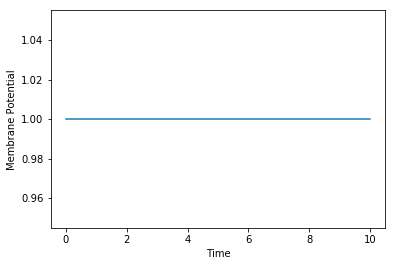

In [98]:
#Implementation of the membrane potential equation (2) of a neuron
def mem_pot(v,t):
    
    for i in range(0,len(time)):
        dvdt = v_ext * delta_func(time[i] - t_dr[i]) + sum(u * J / 3 for k in range(1,3)) * delta_func(time[i] - t_sp[i]) - v_max * delta_func(time[i] - t_sp[i])
    
    return dvdt

#Set initial condition arbitrarily
v0 = 1

v = odeint(mem_pot,v0,time)
    
plt.plot(time,v)
plt.ylabel('Membrane Potential')
plt.xlabel('Time')
plt.show()

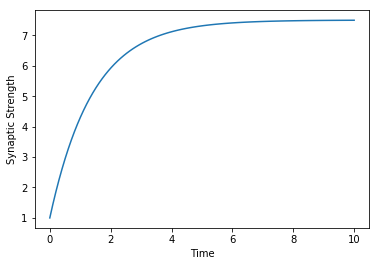

In [97]:
#Implementation of the synaptic strength equation (2) between two neurons
def syn_str(j,t):
    
    relax_time = 1.414
    contr_par = 1.50
    
    for i in range(0,len(time)):
        djdt = 1 / relax_time * (contr_par / u - j) - u * j * delta_func(time[i] - t_sp[i])
    
    return djdt

#Set initial condition arbitrarily
j0 = 1

j = odeint(syn_str,j0,time)

plt.plot(time,j)
plt.ylabel('Synaptic Strength')
plt.xlabel('Time')
plt.show()